## Ví dụ Python


Để tiện cho việc trực quan một cách tốt nhất. Trong ví dụ này mình sẽ lấy một ví dụ về việc giải bài toán Linear Regression với dữ liệu đầu vào là 1 chiều.
### Bài toán đặt ra:
Cho file dữ liệu "Book1.csv" bao gồm dữ liệu về chiều cao và cân nặng tương ứng, liệu có thể dự đoán cân nặng của một người dựa vào chiều cao của họ không?

Ở Bài toán này, ta chỉ nghĩ đơn giản rằng tất nhiêu là ta có thể dự đoán được và có thể là cân nặng sẽ tỉ lệ thuận với chiều cao nên ta có thể sử dụng Linear model để đưa ra dự đoán này.

#### 1.Khai báo thư viện

In [3]:
import pandas as pd # Thư viện dùng để đọc file dữ liệu 
import matplotlib.pyplot as plt # Thư viện dùng cho trực quan hóa dữ liệu
import numpy as np # thư viện là việc với mảng

In [4]:
# đọc dữ liệu từ file
dataset = pd.read_csv("Book1.csv")
print(dataset)

    Height (cm)  Weight (kg)
0           147           49
1           150           50
2           153           51
3           155           52
4           158           54
5           160           56
6           163           58
7           165           59
8           168           60
9           170           65
10          173           63
11          175           64
12          178           66
13          180           67
14          183           68
15          145           49
16          177           63


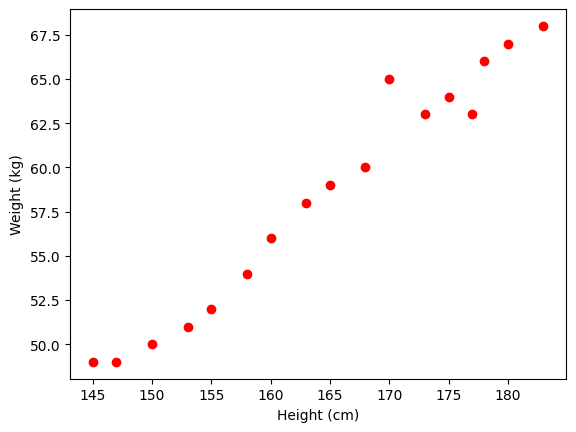

In [5]:
#Visualize data
plt.plot(dataset['Height (cm)'], dataset['Weight (kg)'], 'ro') # Thực hiện việc vẽ biểu đồ với x là cột Height và y là cột Weight
plt.xlabel("Height (cm)") # đặt tên cho cột X
plt.ylabel("Weight (kg)") # đặt tên cho trục Y
plt.show()

Từ đồ thị ta có thể thấy đây trông khá giống như một đường thẳng. Nếu vậy, ta có thể ngầm định được:
### Weight = w0 + w1 * Height

### Đầu tiên chúng ta sẽ cùng đi xây dựng công thức hàm cho bài toán


In [6]:
X = np.array([dataset['Height (cm)']]).T
y = np.array([dataset['Weight (kg)']]).T
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)

w = np.dot(np.linalg.pinv(A), b)
print("w = [{:.2f} {:.2f}]".format(w[0][0], w[1][0]))

w = [-31.06 0.54]


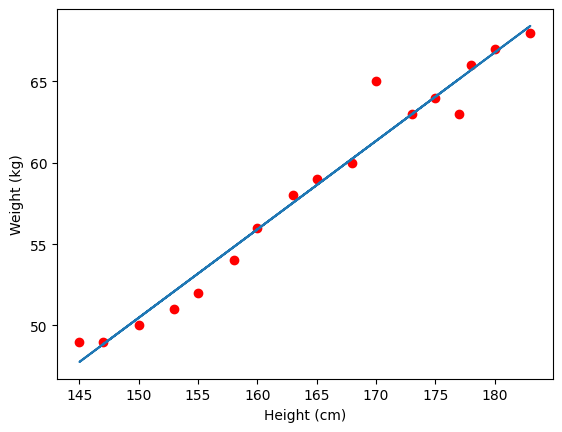

In [24]:
plt.plot(dataset['Height (cm)'], dataset['Weight (kg)'], 'ro')
plt.plot(X, w[0][0] + X*w[1][0])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

In [7]:
y1 = w[1][0]*155 + w[0][0]
y2 = w[1][0]*160 + w[0][0]

print( u'Predict weight of person with height 155 cm: %.2f (kg)'  %(y1) )
print( u'Predict weight of person with height 160 cm: %.2f (kg)'  %(y2) )

Predict weight of person with height 155 cm: 53.19 (kg)
Predict weight of person with height 160 cm: 55.91 (kg)


### Áp dụng thư viện 

In [10]:
from sklearn import linear_model

predict = linear_model.LinearRegression(fit_intercept=False)
predict.fit(Xbar, y)
print(predict.coef_)

[[-31.06499672   0.54360891]]


#### -> Nhận thấy đáp án cũng khá tương đồng với việc xây dựng như trên

Quan ví dụ trên ta cũng có thể hiểu sơ qua được cách sử dụng Linear Regression model trong thực tế.